In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

In [37]:
df_costs = pd.read_csv("sim_data_full_with_costs_corrected.csv")
df_costs = df_costs[["archetype", "transmission_level", "scenario_number", "mean", "std", "mean_iptsc", "std_iptsc"]]
df_costs.rename(columns={"mean": "cost_mean", "std": "cost_std", "mean_iptsc": "cost_IPTsc_mean", "std_iptsc": "cost_IPTsc_std"}, inplace=True)

df_raw = pd.read_csv("sim_data_raw.csv")
df_raw = df_raw[["archetype", "transmission_level", "scenario_number", "clinical_incidence_all"]]
df_raw["cases"] = df_raw["clinical_incidence_all"]*5000
# Get mean and stdev of cases
df_cases = df_raw.groupby(["archetype", "transmission_level", "scenario_number"]).agg({"cases": ["mean", "std"]}).reset_index()
df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])

df_scenarios = pd.read_csv("../../run_sims/Assets/scenario_master_list.csv")
df = pd.merge(df, df_scenarios[["archetype", "scenario_number", "comments"]], on=["archetype", "scenario_number"])

df.rename(columns={("cases", "mean"): "cases_mean",
                   ("cases", "std"): "cases_std"}, inplace=True)
df

C:\Users\joshsu\AppData\Local\Temp\ipykernel_35308\3052325694.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])
C:\Users\joshsu\AppData\Local\Temp\ipykernel_35308\3052325694.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])


,archetype,transmission_level,scenario_number,cost_mean,cost_std,cost_IPTsc_mean,cost_IPTsc_std,cases_mean,cases_std,comments
0,Central,0.05,0,13515.606913,2111.463641,0.000000,0.000000,6029.420900,170.098339,No IPTsc
1,Central,0.10,0,13924.492711,2173.949547,0.000000,0.000000,5939.191469,153.868286,No IPTsc
2,Central,0.20,0,18555.945817,2953.446063,0.000000,0.000000,6684.382831,103.193884,No IPTsc
3,Central,0.30,0,21540.746463,3470.073071,0.000000,0.000000,6975.190576,88.880312,No IPTsc
4,Central,0.40,0,24805.441372,4050.598704,0.000000,0.000000,7159.926498,83.860444,No IPTsc
...,...,...,...,...,...,...,...,...,...,...
110,Southern,0.05,9,28911.179685,1574.288687,24435.524126,1391.735672,1085.255048,382.213400,DP month
111,Southern,0.10,9,31077.164603,1688.091396,24961.381004,1425.165487,1795.228737,295.557103,DP month
112,Southern,0.20,9,34171.878292,1987.819370,24590.487624,1410.503846,2567.773054,150.665002,DP month
113,Southern,0.30,9,39653.339973,2622.320037,25485.022567,1457.565234,3593.362750,107.524129,DP month


In [38]:
df2 = pd.read_csv("sim_data_raw_with_cost_ranges.csv")
df2

C:\Users\joshsu\AppData\Local\Temp\ipykernel_35308\1089644126.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("sim_data_raw_with_cost_ranges.csv")


,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,received_smc_10-15,received_ivermectin,received_primaquine,pfpr0_5,...,cost_SMC_u5_mean,cost_facility_low,cost_facility_high,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean
0,0,0,2861,0,0,0,0,0,0,0.087048,...,0.0000,12931.72,34103.12,0.0,3500,0.0,0.0,16431.72,37603.120,27017.4200
1,0,0,2813,0,0,0,0,0,0,0.090804,...,0.0000,12714.76,33530.96,0.0,3500,0.0,0.0,16214.76,37030.960,26622.8600
2,0,0,2686,0,0,0,0,0,0,0.092848,...,0.0000,12140.72,32017.12,0.0,3500,0.0,0.0,15640.72,35517.120,25578.9200
3,0,0,2962,0,0,0,0,0,0,0.094327,...,0.0000,13388.24,35307.04,0.0,3500,0.0,0.0,16888.24,38807.040,27847.6400
4,0,0,2801,0,0,0,0,0,0,0.092801,...,0.0000,12660.52,33387.92,0.0,3500,0.0,0.0,16160.52,36887.920,26524.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0,0,4391,0,3734,3405,0,0,0,0.300372,...,6245.1150,19847.32,52340.72,0.0,3500,0.0,0.0,33733.24,79890.255,56811.7475
11496,0,0,4476,0,3838,3413,0,0,0,0.308730,...,6419.0550,20231.52,53353.92,0.0,3500,0.0,0.0,34220.88,81199.455,57710.1675
11497,0,0,4426,0,3698,3363,0,0,0,0.298432,...,6184.9050,20005.52,52757.92,0.0,3500,0.0,0.0,33771.68,80036.105,56903.8925
11498,0,0,4519,0,3703,3384,0,0,0,0.297721,...,6193.2675,20425.88,53866.48,0.0,3500,0.0,0.0,34241.13,81247.645,57744.3875


In [39]:
df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_drugs": ["mean", "std"]}).reset_index()

archetype scenario_number cost_IPTsc_drugs             
                                         mean          std
0    Central               0          0.00000     0.000000
1    Central               5          0.00000     0.000000
2    Central               6       2487.79600    67.332896
3    Central               7       9041.60900   253.531766
4    Central               8      10634.93972   286.881914
5    Central               9      38692.11164  1093.227423
6      Sahel               0          0.00000     0.000000
7      Sahel               5          0.00000     0.000000
8      Sahel               6       1742.44210    41.063469
9      Sahel               7       5239.61270   126.588351
10     Sahel               8      10662.41304   247.739821
11     Sahel               9      32019.90408   760.380814
12     Sahel              23       8114.49052   235.311218
13     Sahel              30       1157.87910    55.345514
14     Sahel              31       2104.85030    60.184471
15     Sahel              32       7081.37128   347.397972
16     Sahel              33      12866.25352   364.042528
17  Southern               0          0.00000     0.000000
18  Southern               5          0.00000     0.000000
19  Southern               6       2474.43100    54.776342
20  Southern               7       9837.63500   213.996367
21  Southern               8      10587.93676   234.416290
22  Southern               9      42111.56200   899.713977

In [40]:
def sample_as_normal(min_val, max_val, n_samples):
    # Sample from normal distribution where 99% of probability distribution is within min and max
    mean = (min_val + max_val) / 2
    sigma = 0.194*(max_val - min_val)
    return np.random.normal(mean, sigma, n_samples)

In [55]:
# Sample to get cost range for overheads
low = df2[np.in1d(df2["scenario_number"],[6,8])].agg({"cost_IPTsc_overhead_low": "mean"}).values[0]
high = df2[np.in1d(df2["scenario_number"],[6,8])].agg({"cost_IPTsc_overhead_high": "mean"}).values[0]

samples = sample_as_normal(low,high,10000)
# print(np.mean(samples))
# print(np.std(samples))
# print((high-np.mean(samples))/1.96)
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_low": ["mean", "std"]}).reset_index()
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_high": ["mean", "std"]}).reset_index()

term_iptsc_overhead_cost_per_1k = np.mean(samples)/5
term_iptsc_overhead_cost_per_1k_std = np.std(samples)/5
old_iptsc_overhead_cost_range = (high-np.mean(samples))/5
print(term_iptsc_overhead_cost_per_1k_std/old_iptsc_overhead_cost_range)

0.3847653335675979


447.0379200000001
3675.6451199999997


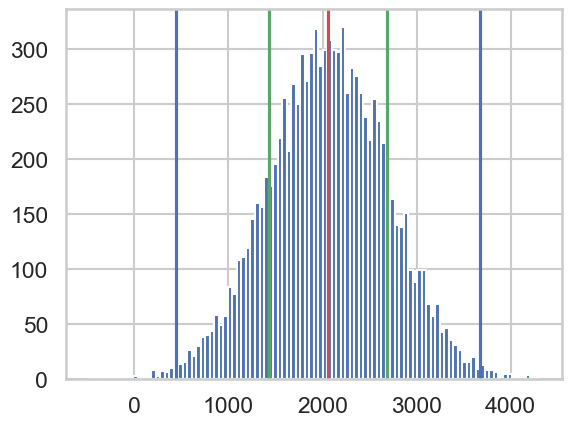

In [54]:
print(low)
print(high)
plt.hist(samples, bins=100)
plt.axvline(np.mean(samples), color='r')
plt.axvline(np.mean(samples)+np.std(samples), color='g')
plt.axvline(np.mean(samples)-np.std(samples), color='g')
plt.axvline(low, color='b')
plt.axvline(high, color='b')

In [56]:
# Sample to get cost range for overheads
low = df2[np.in1d(df2["scenario_number"],[7,9])].agg({"cost_IPTsc_overhead_low": "mean"}).values[0]
high = df2[np.in1d(df2["scenario_number"],[7,9])].agg({"cost_IPTsc_overhead_high": "mean"}).values[0]

samples = sample_as_normal(low,high,10000)
print(np.mean(samples))
print(np.std(samples))
print((high-np.mean(samples))/1.96)
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_low": ["mean", "std"]}).reset_index()
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_high": ["mean", "std"]}).reset_index()

month_iptsc_overhead_cost_per_1k = np.mean(samples)/5
month_iptsc_overhead_cost_per_1k_std = np.std(samples)/5
old_iptsc_overhead_cost_range = (high-np.mean(samples))/5
print(month_iptsc_overhead_cost_per_1k_std/old_iptsc_overhead_cost_range)

6747.033855450841
2408.012745140343
3193.101767627122
0.38476002977726614


In [50]:
df2[np.in1d(df2["scenario_number"],[30,32])].agg({"cost_IPTsc_overhead_high": "mean"})

cost_IPTsc_overhead_high    7163.203435
dtype: float64

In [62]:
# Sample to get cost range for overheads
low = df2[np.in1d(df2["scenario_number"],[30,32])].agg({"cost_IPTsc_overhead_low": "mean"}).values[0]
high = df2[np.in1d(df2["scenario_number"],[30,32])].agg({"cost_IPTsc_overhead_high": "mean"}).values[0]

samples = sample_as_normal(low,high,10000)
# print(np.mean(samples))
# print(np.std(samples))
# print((high-np.mean(samples))/1.96)
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_low": ["mean", "std"]}).reset_index()
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_high": ["mean", "std"]}).reset_index()

u10_smc_overhead_cost_per_1k = np.mean(samples)/5
u10_smc_overhead_cost_per_1k_std = np.std(samples)/5
old_iptsc_overhead_cost_range = (high-np.mean(samples))/5
print(u10_smc_overhead_cost_per_1k_std/old_iptsc_overhead_cost_range)

0.39261439416545674


0.0
7163.203435


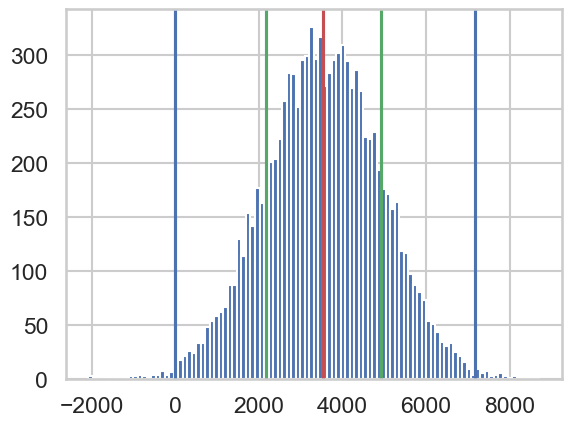

In [61]:
print(low)
print(high)
plt.hist(samples, bins=100)
plt.axvline(np.mean(samples), color='r')
plt.axvline(np.mean(samples)+np.std(samples), color='g')
plt.axvline(np.mean(samples)-np.std(samples), color='g')
plt.axvline(low, color='b')
plt.axvline(high, color='b')

In [63]:
# Sample to get cost range for overheads
low = df2[np.in1d(df2["scenario_number"],[31,33])].agg({"cost_IPTsc_overhead_low": "mean"}).values[0]
high = df2[np.in1d(df2["scenario_number"],[31,33])].agg({"cost_IPTsc_overhead_high": "mean"}).values[0]

samples = sample_as_normal(low,high,10000)
print(np.mean(samples))
print(np.std(samples))
print((high-np.mean(samples))/1.96)
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_low": ["mean", "std"]}).reset_index()
# df2.groupby(["archetype","scenario_number"]).agg({"cost_IPTsc_overhead_high": ["mean", "std"]}).reset_index()

u15_smc_overhead_cost_per_1k = np.mean(samples)/5
u15_smc_overhead_cost_per_1k_std = np.std(samples)/5
old_iptsc_overhead_cost_range = (high-low)/5
print(u15_smc_overhead_cost_per_1k_std/old_iptsc_overhead_cost_range)

6492.494854509503
2531.5048512114286
3329.482928821683
0.1944576841136432


In [45]:
u10_spaq_drug_cost = df2[np.in1d(df2["scenario_number"],[30])].agg({"cost_IPTsc_drugs": "mean"}).values[0]
u10_spaq_drug_cost_std = df2[np.in1d(df2["scenario_number"],[30])].agg({"cost_IPTsc_drugs": "std"}).values[0]
u10_spaq_drug_cost_per_1k = u10_spaq_drug_cost/5
u10_spaq_drug_cost_per_1k_std = u10_spaq_drug_cost_std/5

u10_dp_drug_cost = df2[np.in1d(df2["scenario_number"],[32])].agg({"cost_IPTsc_drugs": "mean"}).values[0]
u10_dp_drug_cost_std = df2[np.in1d(df2["scenario_number"],[32])].agg({"cost_IPTsc_drugs": "std"}).values[0]
u10_dp_drug_cost_per_1k = u10_dp_drug_cost/5
u10_dp_drug_cost_per_1k_std = u10_dp_drug_cost_std/5

print(u10_spaq_drug_cost_per_1k/u10_dp_drug_cost_per_1k)

u15_spaq_drug_cost = df2[np.in1d(df2["scenario_number"],[31])].agg({"cost_IPTsc_drugs": "mean"}).values[0]
u15_spaq_drug_cost_std = df2[np.in1d(df2["scenario_number"],[31])].agg({"cost_IPTsc_drugs": "std"}).values[0]
u15_spaq_drug_cost_per_1k = u15_spaq_drug_cost/5
u15_spaq_drug_cost_per_1k_std = u15_spaq_drug_cost_std/5

u15_dp_drug_cost = df2[np.in1d(df2["scenario_number"],[33])].agg({"cost_IPTsc_drugs": "mean"}).values[0]
u15_dp_drug_cost_std = df2[np.in1d(df2["scenario_number"],[33])].agg({"cost_IPTsc_drugs": "std"}).values[0]
u15_dp_drug_cost_per_1k = u15_dp_drug_cost/5
u15_dp_drug_cost_per_1k_std = u15_dp_drug_cost_std/5

print(u15_spaq_drug_cost_per_1k/u15_dp_drug_cost_per_1k)

0.16351057644304168
0.1635946545533326


In [64]:
print("Following are cost per 1000")
print("Cost of ASAQ term - drugs: {} (stdev {})".format(2487.79600/10, 67.332896/10))
print("Cost of ASAQ month - drugs: {} (stdev {})".format(9041.60900/10, 253.531766/10))
print("Cost of SPAQ term - drugs: {} (stdev {})".format(1742.44210/10, 41.063469/10))
print("Cost of SPAQ month - drugs: {} (stdev {})".format(5239.61270/10, 126.588351/10))
print("Cost of DP term - drugs: {} (stdev {})".format(10634.93972/10, 286.881914/10))
print("Cost of DP month - drugs: {} (stdev {})".format(38692.11164/10, 1093.227423/10))
print("Overhead cost of term school-based: {} (stdev {})".format(term_iptsc_overhead_cost_per_1k/2, term_iptsc_overhead_cost_per_1k_std/2))
print("Overhead cost of monthly school-based: {} (stdev {})".format(month_iptsc_overhead_cost_per_1k/2, month_iptsc_overhead_cost_per_1k_std/2))


print("Cost of SPAQ u10 - drugs: {} (stdev {})".format(u10_spaq_drug_cost_per_1k/2, u10_spaq_drug_cost_per_1k_std/2))
print("Cost of DP u10 - drugs: {} (stdev {})".format(u10_dp_drug_cost_per_1k/2, u10_dp_drug_cost_per_1k_std/2))
print("Cost of SPAQ u15 - drugs: {} (stdev {})".format(u15_spaq_drug_cost_per_1k/2, u15_spaq_drug_cost_per_1k_std/2))
print("Cost of DP u15 - drugs: {} (stdev {})".format(u15_dp_drug_cost_per_1k/2, u15_dp_drug_cost_per_1k_std/2))

print("Overhead cost of u10 SMC: {} (stdev {})".format(u10_smc_overhead_cost_per_1k/2, u10_smc_overhead_cost_per_1k_std/2))
print("Overhead cost of u15 SMC: {} (stdev {})".format(u15_smc_overhead_cost_per_1k/2, u15_smc_overhead_cost_per_1k_std/2))



Following are cost per 1000
Cost of ASAQ term - drugs: 248.7796 (stdev 6.733289600000001)
Cost of ASAQ month - drugs: 904.1609000000001 (stdev 25.3531766)
Cost of SPAQ term - drugs: 174.24421 (stdev 4.1063469)
Cost of SPAQ month - drugs: 523.96127 (stdev 12.658835100000001)
Cost of DP term - drugs: 1063.493972 (stdev 28.6881914)
Cost of DP month - drugs: 3869.2111640000003 (stdev 109.3227423)
Overhead cost of term school-based: 205.83618484399472 (stdev 62.22745374550997)
Overhead cost of monthly school-based: 674.7033855450841 (stdev 240.80127451403433)
Cost of SPAQ u10 - drugs: 115.78791000000001 (stdev 5.534551354834337)
Cost of DP u10 - drugs: 708.1371280000001 (stdev 34.739797240978604)
Cost of SPAQ u15 - drugs: 210.48502999999997 (stdev 6.01844711370141)
Cost of DP u15 - drugs: 1286.625352 (stdev 36.4042527601673)
Overhead cost of u10 SMC: 359.65704477386964 (stdev 140.031144950413)
Overhead cost of u15 SMC: 649.2494854509503 (stdev 253.15048512114285)


In [65]:
print(term_iptsc_overhead_cost_per_1k/2-term_iptsc_overhead_cost_per_1k_std/2)
print(term_iptsc_overhead_cost_per_1k/2+term_iptsc_overhead_cost_per_1k_std/2)


print(month_iptsc_overhead_cost_per_1k/2-month_iptsc_overhead_cost_per_1k_std/2)
print(month_iptsc_overhead_cost_per_1k/2+month_iptsc_overhead_cost_per_1k_std/2)

print(u10_smc_overhead_cost_per_1k/2-u10_smc_overhead_cost_per_1k_std/2)
print(u10_smc_overhead_cost_per_1k/2+u10_smc_overhead_cost_per_1k_std/2)

print(u15_smc_overhead_cost_per_1k/2-u15_smc_overhead_cost_per_1k_std/2)
print(u15_smc_overhead_cost_per_1k/2+u15_smc_overhead_cost_per_1k_std/2)

143.60873109848475
268.0636385895047
433.90211103104974
915.5046600591184
219.62589982345665
499.68818972428267
396.0990003298074
902.3999705720931


In [66]:
term_iptsc_overhead_cost_per_1k/u10_smc_overhead_cost_per_1k

0.5723123954750057